In [1]:
from astropy.io import fits
import os
from spotfinder import spotfinder
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import math
# import sys 
# sys.path.append("/data/common/software/products/")
import sbigCam as sbc
import time
import pandas as pd
from scipy.stats import norm
import matplotlib.colors as mcolors
plt.rcParams.update({"figure.dpi":130})
# import circle_fit as cf

In [29]:
def find_spot(fitsname, fitspath,  
              expected_spot_count=1, 
              regionsname='regions.reg', 
              verbose=False):
    """
    spotfinder handler
    input:
        fitsname:
        fitspath (str): relative or full path to the folder
        regionsname (str):
        verbose (bool):
    output: 
        centroids (dict): raw output from spotfinder

    """
    assert isinstance(fitsname, str)

    _ifn = f"{fitspath}/{fitsname}"

    if expected_spot_count != 1:
        raise NotImplementedError("This mode wasn't tested here")
    try: 
        sf=spotfinder.SpotFinder(_ifn, expected_spot_count)
        centroids = sf.get_centroids(print_summary = verbose, 
                                     region_file=regionsname)
        if verbose: print(centroids)
    
    except: #ignore photo if an error is raised
        print("Warning: spot not found ")
        inval_number = np.nan
        return {  'peaks': [inval_number], 
                      'x': [inval_number], 
                      'y': [inval_number], 
                   'fwhm': [inval_number], 
                 'energy': [inval_number]} 
    return centroids



def format_img(plt, haslim=False):
    plt.colorbar(label ='Photo ID')
    plt.title('Detected spots')
    plt.xlabel('X coordinate (pix)')
    plt.ylabel('Y coordinate (pix)')
    if not haslim:
        plt.gca().invert_yaxis()
        plt.axis('equal')
    
    

In [107]:
root = 'sbigpics/testarc/'
files = !ls '{root}'


data= {'x':[], 'y':[], 'peaks':[], 'fwhm':[]}
fdb = open("testdb.csv", "a")
for i, ff in enumerate(files[:]): 
    _cent = find_spot(ff, root)
    mvlabel = time.strftime("%y%m%d-%H%M%S")
    i3=(1) #mvlabel)
    for k, v in data.items():
        data[k].append(_cent[k][0])
    posid=4852
    idir,  ispeed, imotor, iangle = 'cw', 'cruise', 'theta', 20
    imount = 5
    session_label="test"
    

    """
    
    """
    datafn = 'testdb.csv'
    with open(datafn, "a") as fdb:
        fdb.write(f"{session_label} {imount} ") #mount wise
        fdb.write(f"{mvlabel} {posid} {idir} {ispeed} {imotor} {iangle} ") # asked move
        fdb.write(f"{_cent['x'][0]} {_cent['y'][0]:} {_cent['peaks'][0]:.4f} {_cent['fwhm'][0]:.4f}\n") #read move
        
    time.sleep(1)

Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73429.16174515795 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 72855.3913041894 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 71519.86683703448 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 70578.28658909236 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 69691.22480740737 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 75850.8315917966 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 72183.8412698017 bright

In [110]:
root = 'sbigpics/testarc/'
files = !ls '{root}'


data= {'x':[], 'y':[], 'peaks':[], 'fwhm':[]}
del data

session_label="test"

def write_db(session_label, imount, mvlabel, posid, imove, cent, 
             dbname="output/database.csv" ):
    """
    cent = centroids from spotfinder 
    imove = [dir, speed, motor, angle ]
    """
    idir, ispeed, imotor, iangle = imove
    with open(dbname, 'a') as fdb:
        fdb.write(f"{session_label} {imount} ") #mount wise
        fdb.write(f"{mvlabel} {posid} {idir} {ispeed} {imotor} {iangle} ") # asked move
        fdb.write(f"{cent['x'][0]} {cent['y'][0]:} {cent['peaks'][0]:.4f} {cent['fwhm'][0]:.4f}\n") #read move        
    
    
    
for i, ff in enumerate(files[:]): 
    #--------------- DATA ---------------
    _cent = find_spot(ff, root)
    mvlabel = time.strftime("%y%m%d-%H%M%S")

    posid=4852
    idir,  ispeed, imotor, iangle = 'cw', 'cruise', 'theta', 20
    imount = 7
    imove = [idir,  ispeed, imotor, iangle]
    # --------------------------------------

    write_db(session_label, imount, mvlabel, posid, imove, _cent)
    time.sleep(1)

Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73429.16174515795 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 73429.16174515795 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 72855.3913041894 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 72855.3913041894 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 71519.86683703448 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 71519.86683703448 brightness appears out of expected range
here
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
Edge hot spot
peak = 70578.28658909236 brightness appears out of expecte

In [ ]:
root = 'sbigpics/testarc/'
files = !ls '{root}'


data= {'x':[], 'y':[], 'peaks':[], 'fwhm':[]}
del data

session_label="test"

def write_dbconf(session_label, speed, # imount, mvlabel, posid, imove, cent, 
             dbname="output/configdb.csv" ):
    """
    speed = {'theta':{'cruise':33,'spinup':12,'spindown':12},
               'phi':{'cruise':33,'spinup':12,'spindown':12}}
    at fao_seq.py:
        fipos.set_speed(speed)
    device_bb = {"can<>": [posid1, ..., posidN]}

   
    """

    f"{speed['theta']['cruise']} {speed['theta']['spinup']} {speed['theta']['spindown']} "
    f"{speed['phi']['cruise']} {speed['phi']['spinup']} {speed['phi']['spindown']}"
    f"\n"
    with open(dbname,'a') as fdb:
        fdb.write(f"{} {}\n")
        
#     idir, ispeed, imotor, iangle = imove
#     with open(dbname, 'a') as fdb:
#         fdb.write(f"{session_label} {imount} ") #mount wise
#         fdb.write(f"{mvlabel} {posid} {idir} {ispeed} {imotor} {iangle} ") # asked move
#         fdb.write(f"{cent['x'][0]} {cent['y'][0]:} {cent['peaks'][0]:.4f} {cent['fwhm'][0]:.4f}\n") #read move        
    
    
    
for i, ff in enumerate(files[:]): 
    #--------------- DATA ---------------
    _cent = find_spot(ff, root)
    mvlabel = time.strftime("%y%m%d-%H%M%S")

    posid=4852
    idir,  ispeed, imotor, iangle = 'cw', 'cruise', 'theta', 20
    imount = 7
    imove = [idir,  ispeed, imotor, iangle]
    # --------------------------------------

    write_db(session_label, imount, mvlabel, posid, imove, _cent)
    time.sleep(1)

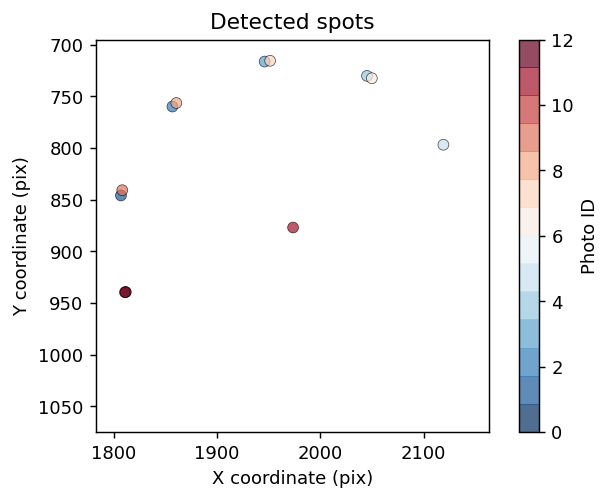

In [32]:
# centers and radial range
xc, yc, rc = 1973, 885, 190

cmap = plt.cm.get_cmap("RdBu_r", len(data['x'])+1)

plt.scatter(data['x'], data['y'], c=np.arange(len(data['x'])), 
            cmap=cmap, 
            edgecolor='k', linewidth=0.4, alpha=0.7)

plt.xlim(xc-rc, xc+rc)
plt.ylim(yc+rc, yc-rc)
format_img(plt, haslim=True)
plt.gca().set_aspect('equal')